# DESARROLLO DE PROYECTO INTEGRADOR M6 MACHINE LEARNING

### INTRODUCCION

Este proyecto integrador tiene como objetivo aplicar técnicas de Machine Learning en el ámbito de la medicina, específicamente para predecir hospitalizaciones tras una biopsia prostática. Al utilizar herramientas informáticas y analíticas, podemos obtener información valiosa a partir de los datos clínicos, lo que permite emitir diagnósticos predictivos, evaluar la efectividad de estrategias de intervención y anticipar comportamientos en escenarios relacionados con la atención médica.

Hemos sido contratados por una consultora de renombre para trabajar en un proyecto de estudio de atención en salud para un importante hospital. Nuestro cliente desea conocer las características más importantes que tienen los pacientes de cierto tipo de enfermedad que terminan en hospitalización.



### 1. INSTALACION DE LAS BIBLIOTECAS
     

In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install -U scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
%matplotlib inline

### 2. CARGA DEL DATASET

In [3]:
%pip install openpyxl

ruta_Archivo = '/Users/felipeamezquita/Library/Mobile Documents/com~apple~CloudDocs/Documents/HENRY/M6/Proyecto_Integrador/Propuesta 1/BBDD_Hospitalización.xlsx'
data = pd.read_excel(ruta_Archivo)


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
data.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


### 3. EDA ANALISIS EXPLORATORIO DE DATOS

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [6]:
data.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,564.000000,568.000000,568.000000,568.000000
mean,63.882042,13.271401,12.996479,0.165493,0.014085
std,9.281517,15.668966,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


Manejo de datos nulos, se cambian valores por el promedio o la moda.

In [7]:
# Verificar valores nulos
data.isnull().sum()



EDAD                                                                          2
DIABETES                                                                      2
HOSPITALIZACIÓN ULTIMO MES                                                    2
PSA                                                                           6
BIOPSIAS PREVIAS                                                              4
VOLUMEN PROSTATICO                                                            3
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       2
NUMERO DE MUESTRAS TOMADAS                                                    2
CUP                                                                           3
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             4
BIOPSIA                                                                       2
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     2
FIEBRE                                  

In [8]:
# Listar columnas numéricas
numeric_columns = data.select_dtypes(include=['float64']).columns

# Rellenar valores nulos en columnas numéricas con la media
for column in numeric_columns:
    data[column].fillna(data[column].mean(), inplace=True)

/var/folders/56/ng1477v167b0_8l7x8rdnw_r0000gn/T/ipykernel_28274/1866162094.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


In [9]:
# Listar columnas categóricas
categorical_columns = data.select_dtypes(include=['object']).columns

# Rellenar valores nulos en columnas categóricas con la moda
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

/var/folders/56/ng1477v167b0_8l7x8rdnw_r0000gn/T/ipykernel_28274/181243143.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


In [10]:
# Verificar valores nulos
data.isnull().sum()

EDAD                                                                         0
DIABETES                                                                     0
HOSPITALIZACIÓN ULTIMO MES                                                   0
PSA                                                                          0
BIOPSIAS PREVIAS                                                             0
VOLUMEN PROSTATICO                                                           0
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                      0
NUMERO DE MUESTRAS TOMADAS                                                   0
CUP                                                                          0
ENF. CRONICA PULMONAR OBSTRUCTIVA                                            0
BIOPSIA                                                                      0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA    0
FIEBRE                                              

### DISTRIBUCION DE LOS VALORES NUMERICOS

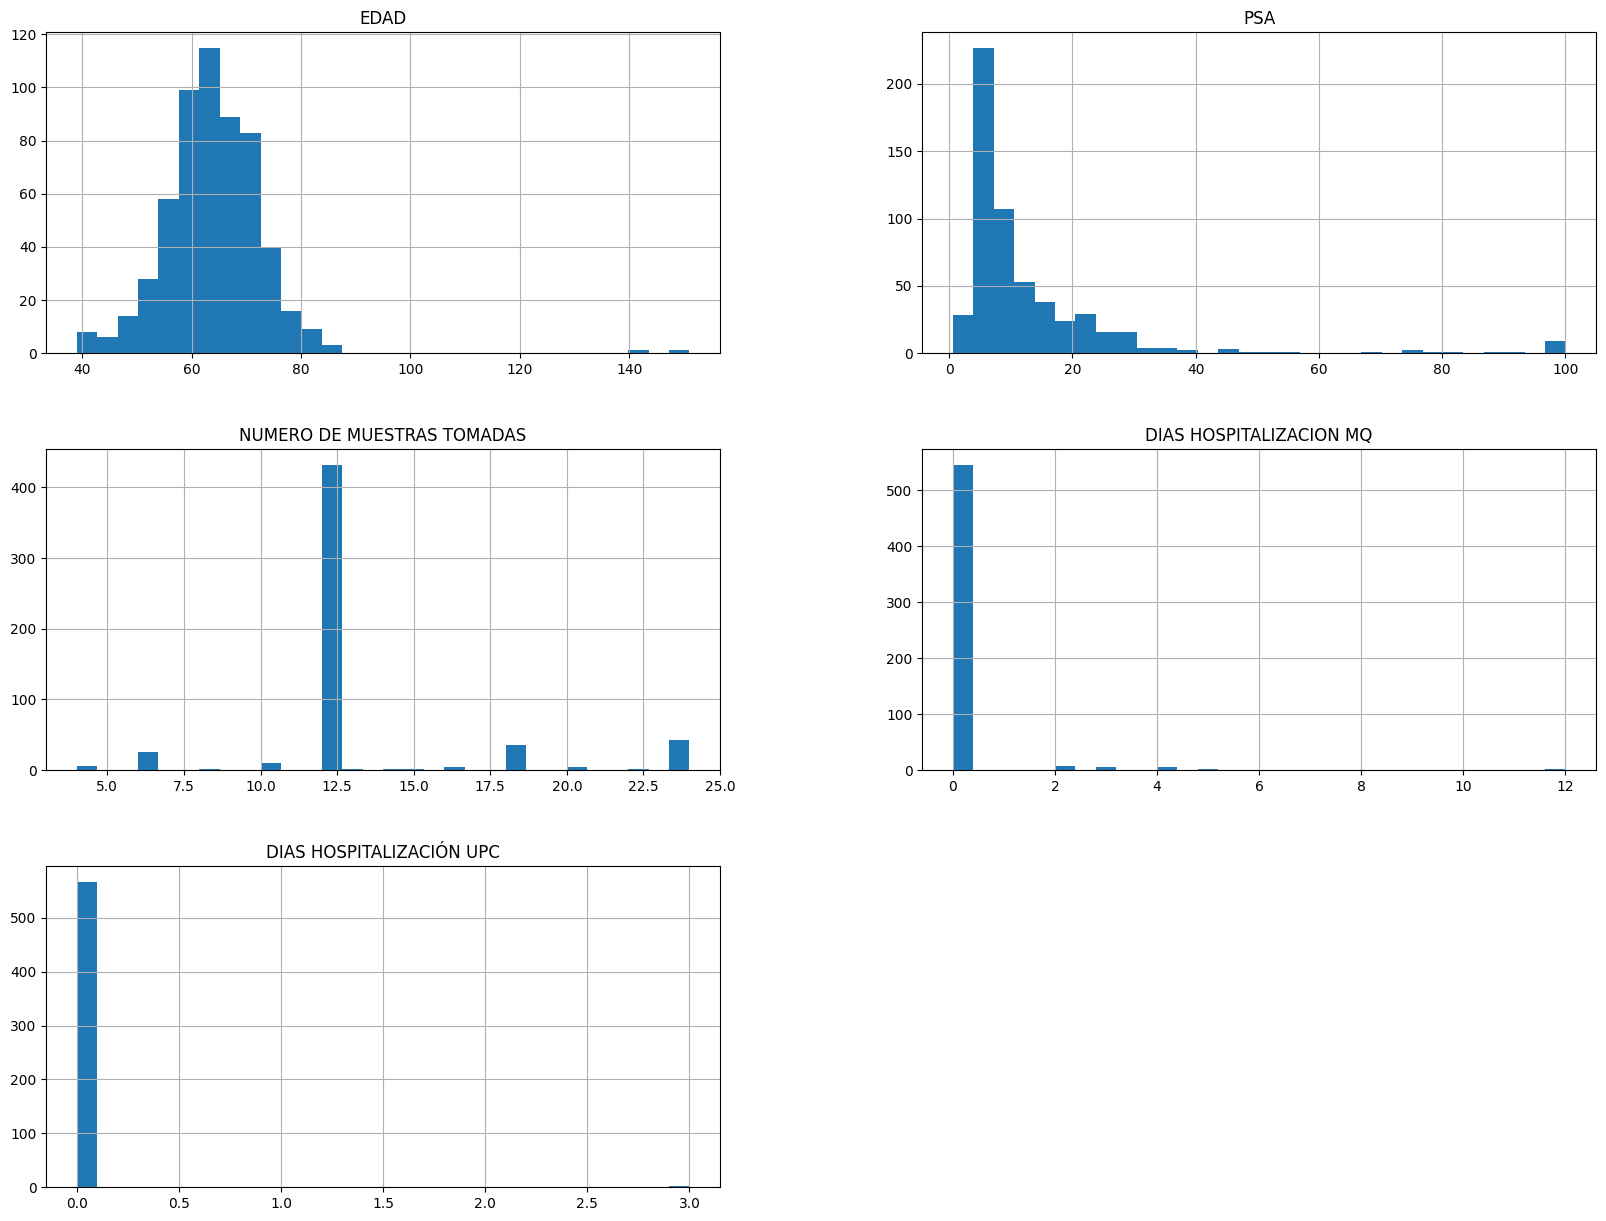

In [11]:
# Visualizar la distribución de las variables numéricas
data.hist(bins=30, figsize=(20, 15))
plt.show()


#### ISTRIBUCION DE LA VARIABLE EDAD

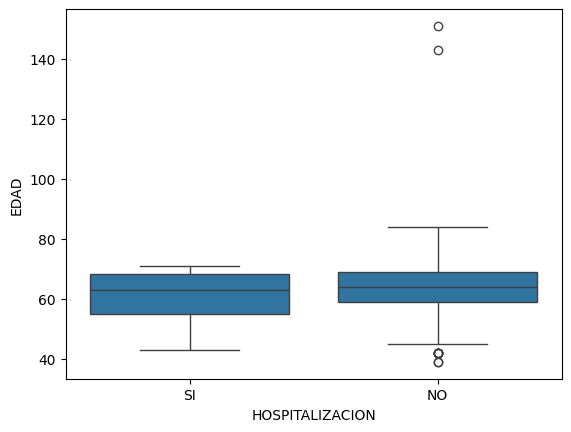

In [12]:
# Visualizar la distribución de una variable específica
sns.boxplot(x='HOSPITALIZACION', y='EDAD', data=data)
plt.show()


# MATRIZ DE CORRELACION

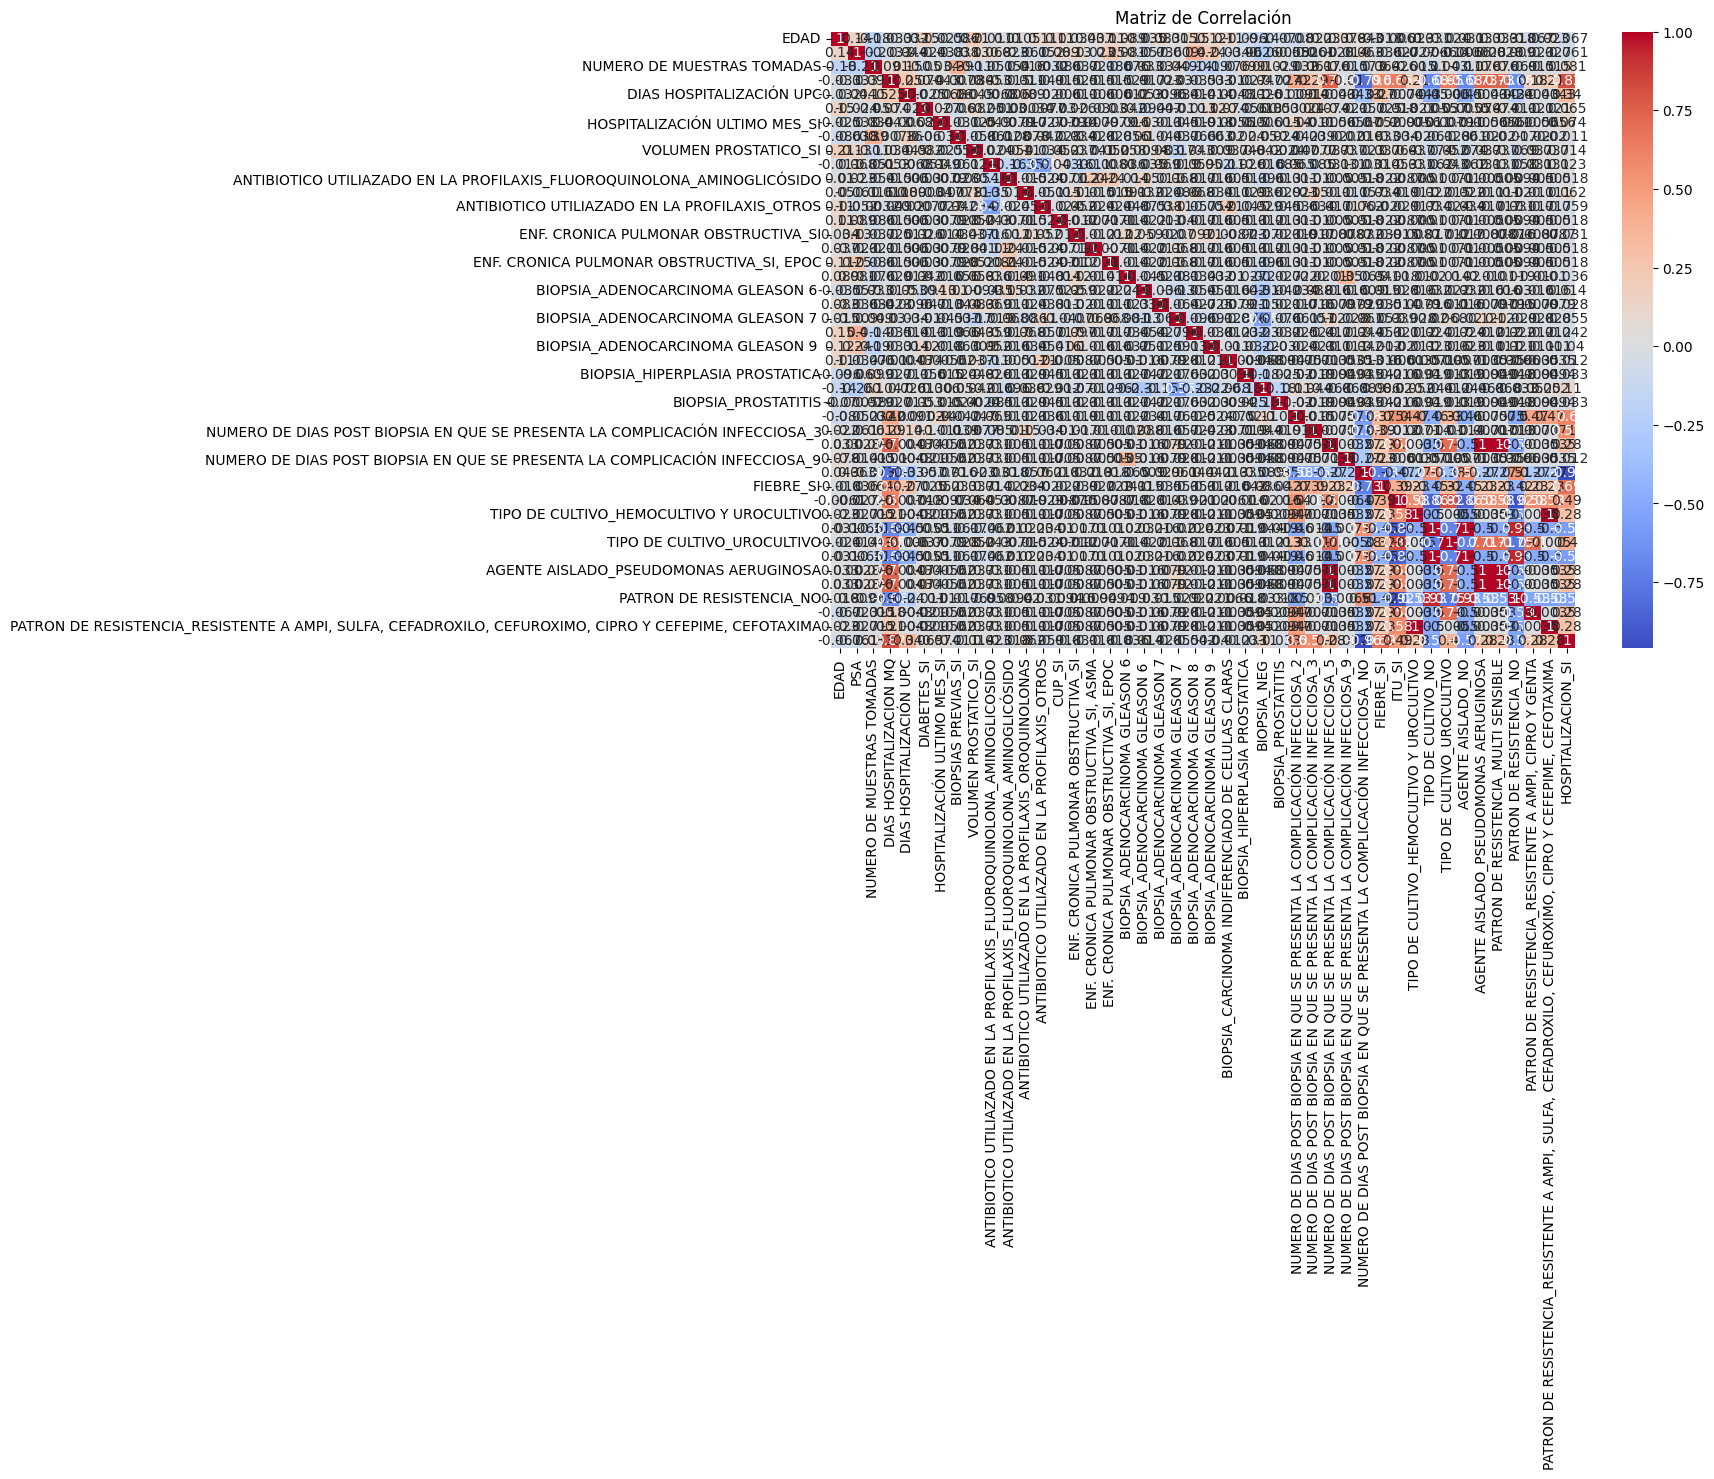

In [13]:
# Codificación One-Hot de variables categóricas
data_encoded = pd.get_dummies(data, drop_first=True)
# Matriz de correlación
correlation_matrix = data_encoded.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

### 4. MODELACION DE LOS DATOS Y DIVISION DE LOS MISMOS


Se divide el dataset en conjuntos de entrenamiento y prueba

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [31]:
# Convertir columnas categóricas a variables numéricas usando One-Hot Encoding
data = pd.get_dummies(data)


In [34]:
print(data.columns)

Index(['EDAD', 'PSA', 'NUMERO DE MUESTRAS TOMADAS', 'DIAS HOSPITALIZACION MQ',
       'DIAS HOSPITALIZACIÓN UPC', 'DIABETES_NO', 'DIABETES_SI',
       'HOSPITALIZACIÓN ULTIMO MES_NO', 'HOSPITALIZACIÓN ULTIMO MES_SI',
       'BIOPSIAS PREVIAS_NO', 'BIOPSIAS PREVIAS_SI', 'VOLUMEN PROSTATICO_NO',
       'VOLUMEN PROSTATICO_SI',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_CEFALOSPORINA_AMINOGLUCOCIDO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_FLUOROQUINOLONA_AMINOGLICOSIDO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_FLUOROQUINOLONA_AMINOGLICÓSIDO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_OROQUINOLONAS',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_OTROS', 'CUP_NO', 'CUP_SI',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA_NO',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI, ASMA',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI, EPOC',
       'BIOPSIA_ADENOCARCINOMA GLEASON 10 ',
       'BIOPSIA_ADENOCARCINOMA GLEASON 6', 'BIO

In [36]:
#  Separar las características (X) y la variable objetivo (y)
X = data.drop(['HOSPITALIZACION_NO', 'HOSPITALIZACION_SI'], axis=1)
y = data['HOSPITALIZACION_SI']


In [37]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Imputar los valores nulos con la media de cada columna
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [42]:
# Inicializar el modelo
model = LogisticRegression(max_iter=1000)

In [43]:
# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [45]:
# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

In [46]:
# Evaluar el modelo
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[109   0]
 [  0   5]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       109
        True       1.00      1.00      1.00         5

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114


Accuracy Score:
1.0


### REGRESION LINEAL

In [49]:
X = data.drop(['DIAS HOSPITALIZACION MQ'], axis=1)
y = data['DIAS HOSPITALIZACION MQ']

In [50]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Inicializar el modelo de regresión lineal
model = LinearRegression()




In [65]:
# Imputar los valores nulos con la media de cada columna


imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

In [66]:

# Imputar NaN en y_train si es necesario (aunque idealmente no debería haber NaN en y_train)
imputer_y = SimpleImputer(strategy='mean')
y_train_imputed = imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()




In [68]:


# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train_imputed, y_train_imputed)


LinearRegression()

In [69]:
# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

In [70]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.27703987976894895
R-squared: 0.5152921005011766


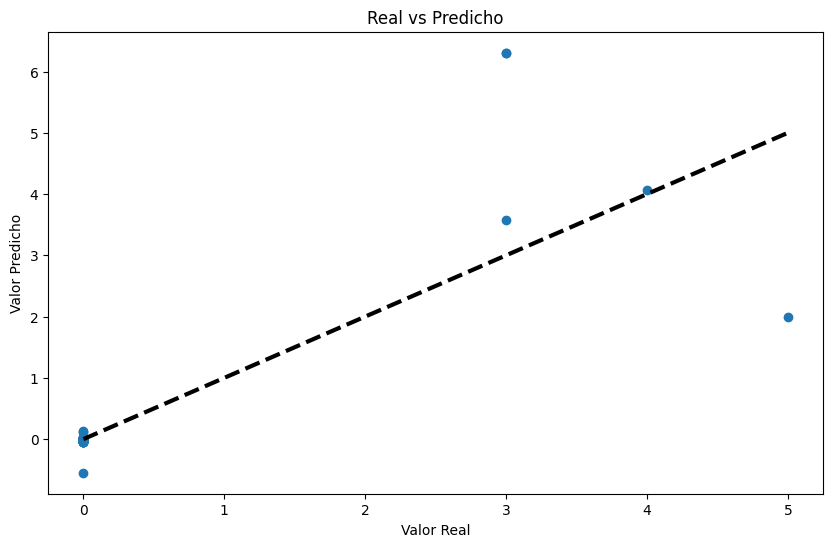

In [71]:
# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Real vs Predicho')
plt.show()

### PRUEBA DEL MODELO

In [72]:
# Hacer predicciones sobre X_test
y_pred = model.predict(X_test)


In [73]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R^2): {r2}")


Mean Squared Error (MSE): 0.27703987976894895
R-squared (R^2): 0.5152921005011766


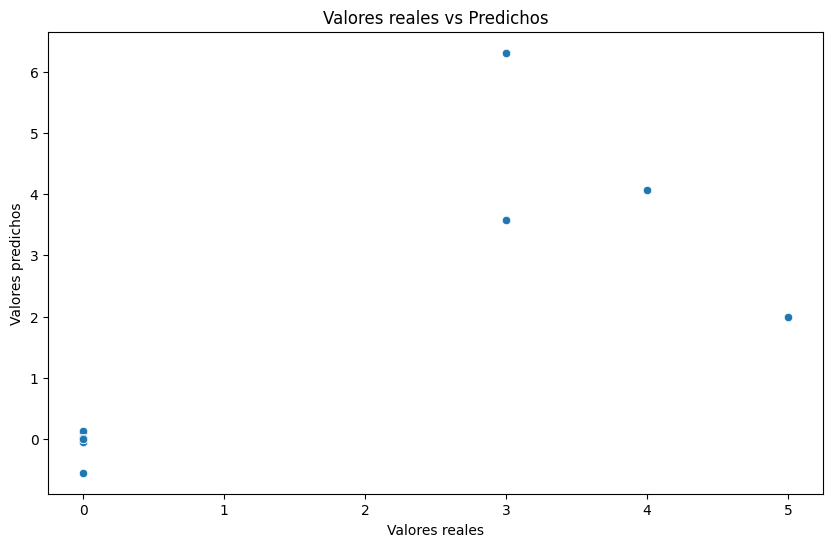

In [74]:
# Graficar los valores reales vs predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Valores reales vs Predichos')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.show()

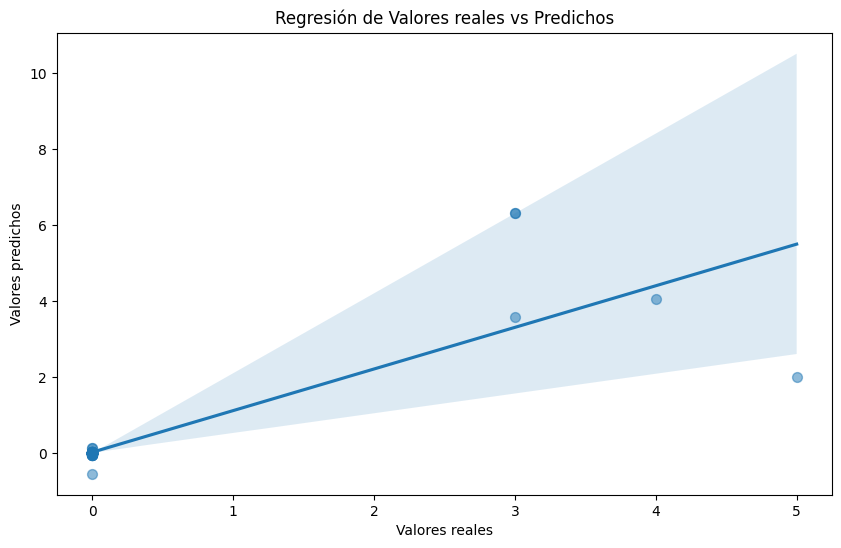

In [75]:
# Graficar una regresión lineal de los valores reales vs predichos
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 50, 'alpha': 0.5})
plt.title('Regresión de Valores reales vs Predichos')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.show()


### ARBOL DE DECISION

In [76]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model_tree = DecisionTreeClassifier(max_depth=3)  # Puedes ajustar max_depth según sea necesario


In [78]:
nan_indices = y_train.index[y_train.isna()]
print("Índices con NaN en y_train:", nan_indices)


Índices con NaN en y_train: Index([569, 568], dtype='int64')


In [79]:
from sklearn.impute import SimpleImputer

# Crear un imputador simple
imputer = SimpleImputer(strategy='most_frequent')  # Puedes usar 'mean' o 'median' dependiendo de tus datos

# Aplicar el imputador a y_train
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Convertir de vuelta a DataFrame si es necesario
y_train = pd.Series(y_train_imputed, index=y_train.index)


In [80]:
nan_indices = y_train.index[y_train.isna()]
print("Índices con NaN en y_train:", nan_indices)


Índices con NaN en y_train: Index([], dtype='int64')


In [81]:
model_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [83]:
unique_classes = y_train.unique()
print("Clases únicas en y_train:", unique_classes)


Clases únicas en y_train: [ 0.  4.  2. 12.  3.  5.]


In [84]:
# Definir un diccionario de mapeo de clases
class_names = {
    0.0: 'No Hospitalización',
    2.0: 'Hospitalización leve',
    3.0: 'Hospitalización moderada',
    4.0: 'Hospitalización grave',
    5.0: 'Hospitalización crítica',
    12.0: 'Otra categoría de hospitalización'
}

# Mapear las clases en y_train usando el diccionario
y_train_mapped = y_train.map(class_names)

# Verificar las clases mapeadas únicas
unique_mapped_classes = y_train_mapped.unique()
print("Clases únicas mapeadas en y_train:", unique_mapped_classes)


Clases únicas mapeadas en y_train: ['No Hospitalización' 'Hospitalización grave' 'Hospitalización leve'
 'Otra categoría de hospitalización' 'Hospitalización moderada'
 'Hospitalización crítica']


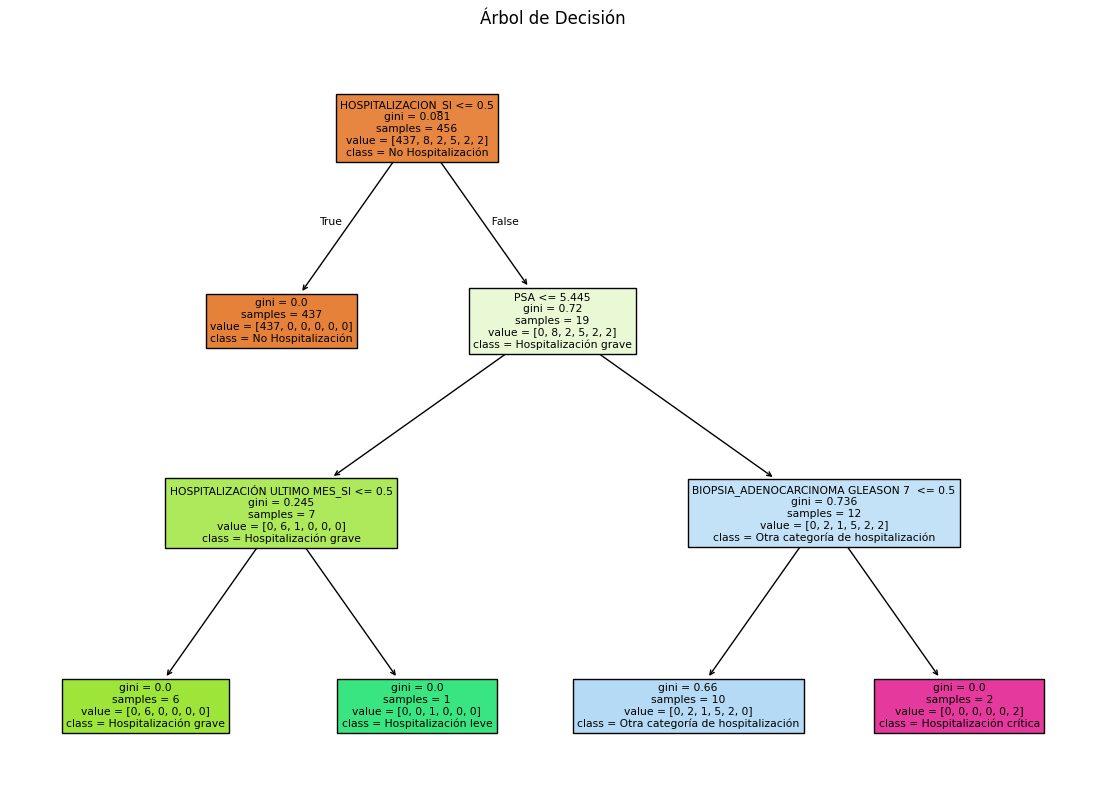

In [85]:
plt.figure(figsize=(14, 10))
plot_tree(model_tree, filled=True, feature_names=X.columns, class_names=unique_mapped_classes.tolist())
plt.title('Árbol de Decisión')
plt.show()

In [86]:
from sklearn.tree import export_text

# Obtener el texto del árbol de decisión
tree_rules = export_text(model_tree, feature_names=list(X.columns))

# Imprimir las reglas del árbol de decisión
print(tree_rules)


|--- HOSPITALIZACION_SI <= 0.50
|   |--- class: 0.0
|--- HOSPITALIZACION_SI >  0.50
|   |--- PSA <= 5.44
|   |   |--- HOSPITALIZACIÓN ULTIMO MES_SI <= 0.50
|   |   |   |--- class: 2.0
|   |   |--- HOSPITALIZACIÓN ULTIMO MES_SI >  0.50
|   |   |   |--- class: 3.0
|   |--- PSA >  5.44
|   |   |--- BIOPSIA_ADENOCARCINOMA GLEASON 7  <= 0.50
|   |   |   |--- class: 4.0
|   |   |--- BIOPSIA_ADENOCARCINOMA GLEASON 7  >  0.50
|   |   |   |--- class: 12.0



# CONCLUSIONES



1. Predicción de No Hospitalización: La primera división del árbol se basa en la variable HOSPITALIZACION_SI. Si esta variable es menor o igual a 0.5, el modelo predice que la clase objetivo (probablemente la no hospitalización) es 0.0. Esto sugiere que esta característica tiene un fuerte poder predictivo para determinar si un paciente no será hospitalizado.

2. Segundo Nivel de Decisión: Si HOSPITALIZACION_SI es mayor que 0.5, el modelo luego evalúa la variable PSA. Si PSA es menor o igual a 5.44, entonces el siguiente criterio que influye en la predicción es HOSPITALIZACIÓN ULTIMO MES_SI. Dependiendo de si esta característica es menor o igual a 0.5, el modelo predice clases diferentes (2.0 o 3.0).

3. Decisiones Basadas en PSA y Biopsia: Si PSA es mayor que 5.44, el árbol se divide en función de la presencia o no de BIOPSIA_ADENOCARCINOMA GLEASON 7. Esto indica que el nivel de PSA y los resultados de biopsia específicos influyen en las predicciones relacionadas con la hospitalización (4.0 o 12.0).

4. Importancia de las Variables: El árbol destaca la importancia de variables específicas como PSA y los resultados de biopsia (BIOPSIA_ADENOCARCINOMA GLEASON 7) en la predicción de hospitalización. Estas variables son cruciales para determinar los posibles escenarios médicos que podrían llevar a una hospitalización.

5. Contextualización Médica: Para una interpretación completa y precisa, es fundamental contextualizar estas divisiones y decisiones con el conocimiento médico y clínico relevante. 